<a href="https://colab.research.google.com/github/HyunseokDE/Beginner-of-class/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Cardiovascular Disease dataset*


---

 ### **심혈관 질환 예측 데이터셋**


 

1.   데이터 분석
2.   데이터 시각화
3.   Logistic Regression
4.   Decision Tree
5.   Support Vector Machine
6.   K-Nearest Neighbors



In [1]:
# Data Handline
import pandas as pd
import numpy as np


# Matplotlib
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
from plotly.subplots import make_subplots


# Model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import tree

# Scikit-learn
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

#Support Vector Classifier
from sklearn import svm
from sklearn.svm import LinearSVC

# Seaborn
import seaborn as sns




> 1. 데이터 분석
>>데이터 전처리



In [2]:
cardio = pd.read_csv("/content/drive/MyDrive/cardio_train.csv",delimiter=";")
print(cardio.shape)
cardio.head()

(70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# **Columns**

1.   age : int(days) \
Age | 일수

2.   height : int(cm) \
Height | 신장

3.   weigh : float(kg) \
Weight | 체중

4.   gender : (1:women, 2:men) \
Gender | 성별

5.   ap_hi : int \
      Systolic blood pressure | 수축기 혈압

6.   ap_lo : int \
      Diastolic blood pressure  |  확장기 
      혈압

7.   cholesterol : (1:noraml, 2: above normal, 3: well above normal)   \
      Cholesterol | 콜레스테롤 수치

8.   gluc : (1: normal, 2: above normal, 3: well above normal)  \
      Glucose | 포도당 수치

9.   smoke : (0:, 1:) \
smoking | 흡연 여부

10.  alco : (0:, 1:) \
alcohol intake | 알코올 섭취 여부

11. active : (0:, 1:) \
Physical activity | 신체활동 여부

12. cardio : (0:, 1:) \
Presence or absence of cardiovascular disease | 심혈관 질환의 유무











>>> 필요없는 column 삭제

In [3]:
cardio.drop(columns=['id'], inplace=True)
cardio.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [4]:
print(cardio.isna().sum())
print('cardio 데이터의 중복된 행의 갯수 : ',cardio.duplicated().sum())
duplicated = cardio[cardio.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['gender', 'height', 'weight'], ascending= False)
duplicated.head()


age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64
cardio 데이터의 중복된 행의 갯수 :  24


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
10494,16937,2,170,70.0,120,80,1,1,0,0,0,0
44653,16937,2,170,70.0,120,80,1,1,0,0,0,0
1142,17493,2,169,74.0,120,80,1,1,0,0,1,1
50432,17493,2,169,74.0,120,80,1,1,0,0,1,1
32683,17535,2,165,65.0,120,80,1,1,0,0,1,0


In [5]:
cardio.drop_duplicates(keep = 'first', inplace = True)
print ("중복 데이터를 제외한 나머지 데이터 수 : ",cardio.shape[0])

중복 데이터를 제외한 나머지 데이터 수 :  69976


In [6]:
cardio.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


>>>### **데이터셋 문제점**
>>>>1.   Age 항목이 일수로 되어있어 가독성 낮음
>>>>2. ap_hi,ap_lo의 이상치 수정(음수, 비정상적으로 높은데이터, hi보다 높은 lo데이터)
>>>>3. 비정상적인 범위의 weight,height 값





1) Age column 일수에서 년수로 변경



In [7]:
cardio['age']=(cardio['age']/365).round(0)
cardio['age']


0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: age, Length: 69976, dtype: float64


2) ap_hi,ap_lo의 이상치 검출  및 수정
 \\




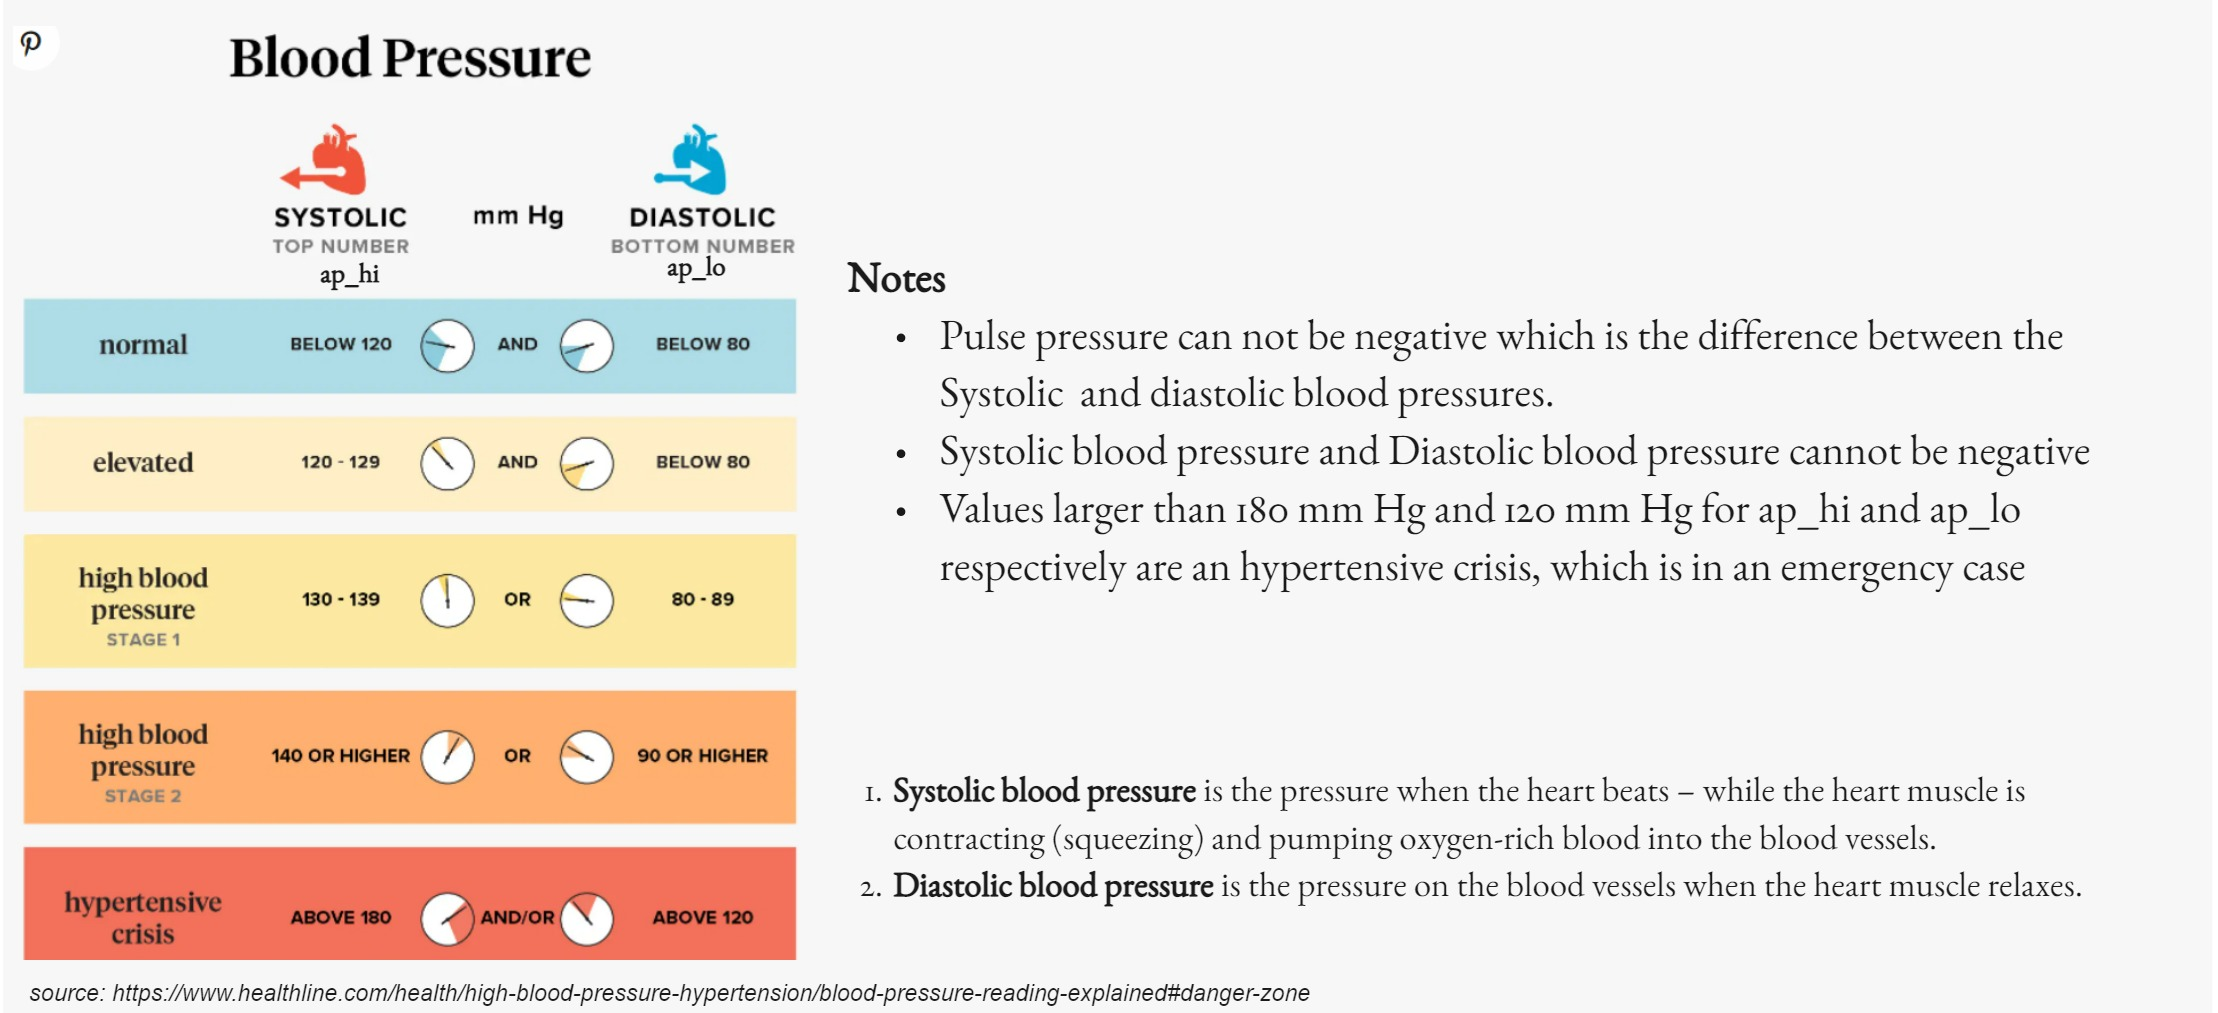



In [8]:
outline_free_cardio = cardio[cardio['ap_lo']>=0]
outline_free_cardio = cardio[cardio['ap_hi']>=0]
outline_free_cardio

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53.0,2,168,76.0,120,80,1,1,1,0,1,0
69996,62.0,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.0,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.0,1,163,72.0,135,80,1,2,0,0,0,1


In [9]:
print('There are total {} observations where ap_hi < ap_lo'.format(len(outline_free_cardio[outline_free_cardio['ap_hi'] < outline_free_cardio['ap_lo']])))

There are total 1227 observations where ap_hi < ap_lo


In [10]:
cleaned_data = outline_free_cardio[outline_free_cardio['ap_hi'] >= outline_free_cardio['ap_lo']].reset_index(drop=True)
print('Total observations preserved : {}'.format(len(cleaned_data)))

Total observations preserved : 68742


In [11]:
mycardio=cleaned_data
mycardio

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68737,53.0,2,168,76.0,120,80,1,1,1,0,1,0
68738,62.0,1,158,126.0,140,90,2,2,0,0,1,1
68739,52.0,2,183,105.0,180,90,3,1,0,1,0,1
68740,61.0,1,163,72.0,135,80,1,2,0,0,0,1


3) 'weight','height' 칼럼의 비정상적인 데이터 수정

In [12]:
fig = go.Figure()

fig.add_trace(go.Box(x=cardio['height'], name = 'Height', boxpoints='outliers',))
fig.add_trace(go.Box(x=cardio['weight'], name = 'Weight', boxpoints='outliers',))

fig.update_layout(title_text="Box Plot for Weight and Height with Outliers")
fig.show()

>>>>> ^ 위 박스 플롯은 키와 몸무게의 이상치를 탐지하기 위하여 작성했으며 중간에 비어있는 부분이 IQR이라 하는 사분위간 범위 이며 펜스라 불리는 박스 양 옆의 범위를 넘어서는 값들을 이상치 즉, outliers라 불립니다.

아래 과정은 IQR 범위를 구하고 박스 밖의 데이터를 이상치로 간주하여 몇 개의 데이터가 이상치로 나타나는지 보여줍니다.

In [13]:
def outliers_iqr(ys):
    quartile1, quartile3 = np.percentile(ys, [25,75])
    iqr = quartile3 - quartile1
    lower_bound = quartile1 - (iqr*3)
    upper_bound = quartile3 + (iqr*3)
    
    print(f'Q1:{quartile1}, Q3:{quartile3}, IQR:{iqr}')
    print(f'Lower Bound:{lower_bound}, Upper Bound:{upper_bound}')
    
    result = np.where((ys > upper_bound) | (ys < lower_bound))
    boundary = (lower_bound, upper_bound)
    
    print(f'Number of outliers: {len(result[0])}')
    
    return result, boundary

In [14]:
height_outlier_index = list(outliers_iqr(mycardio['height'])[0][0])
cardio_height_outlier = mycardio.iloc[height_outlier_index,:]
cardio_height_outlier
print('----------------------------------------------------------------')

weight_outlier_index = list(outliers_iqr(mycardio['weight'])[0][0])
cardio_weight_outlier = mycardio.iloc[weight_outlier_index,:]
cardio_weight_outlier
print('----------------------------------------------------------------')

ap_hi_outlier_index = list(outliers_iqr(mycardio['ap_hi'])[0][0])
cardio_aphi_outlier = mycardio.iloc[ap_hi_outlier_index,:]
cardio_aphi_outlier
print('----------------------------------------------------------------')

ap_lo_outlier_index = list(outliers_iqr(mycardio['ap_lo'])[0][0])
cardio_aplo_outlier = mycardio.iloc[ap_lo_outlier_index,:]
cardio_aplo_outlier

Q1:159.0, Q3:170.0, IQR:11.0
Lower Bound:126.0, Upper Bound:203.0
Number of outliers: 90
----------------------------------------------------------------
Q1:65.0, Q3:82.0, IQR:17.0
Lower Bound:14.0, Upper Bound:133.0
Number of outliers: 163
----------------------------------------------------------------
Q1:120.0, Q3:140.0, IQR:20.0
Lower Bound:60.0, Upper Bound:200.0
Number of outliers: 97
----------------------------------------------------------------
Q1:80.0, Q3:90.0, IQR:10.0
Lower Bound:50.0, Upper Bound:120.0
Number of outliers: 124


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
413,46.0,1,157,72.0,150,30,1,1,0,0,1,1
500,46.0,1,165,64.0,140,40,1,1,0,0,1,1
1980,62.0,2,167,59.0,906,0,1,1,0,0,1,0
4685,52.0,1,158,74.0,200,170,1,1,0,0,1,1
4882,62.0,2,173,74.0,220,160,2,2,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
66998,52.0,2,173,100.0,130,20,1,1,0,0,1,1
67221,42.0,2,179,100.0,200,140,1,2,1,0,1,1
67337,42.0,1,163,71.0,110,6,1,1,0,0,1,0
67431,50.0,1,156,41.0,906,0,1,1,0,0,1,0


In [15]:
# 이상치 데이터를 all_outlier_index객체로 모아서 생성
all_outlier_index = height_outlier_index + weight_outlier_index + ap_hi_outlier_index + ap_lo_outlier_index
all_outlier_index = list(set(all_outlier_index))
print(len(all_outlier_index))

436


In [16]:
# 이상치 포함한 행 삭제
Mycariodataset = mycardio.drop(index = all_outlier_index).reset_index()
Mycariodataset.drop(columns=['index'], inplace=True)


In [17]:
# 'weight'와 'height'가 반영된 bmi 칼럼이 있으면 좋을 것 같다고 생각
Mycariodataset['bmi']=round(Mycariodataset['weight']/((Mycariodataset['height']/100)**2))
Mycariodataset.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,68306.000000,68306.000000,68306.000000,68306.000000,68306.000000,68306.00000,68306.000000,68306.000000,68306.000000,68306.000000,68306.000000,68306.000000,68306.000000
mean,53.329532,1.348373,164.424633,73.934883,126.556657,81.25254,1.364097,1.225119,0.087781,0.053246,0.803399,0.493851,27.376248
std,6.768488,0.476459,7.839244,13.853632,16.436641,9.28169,0.678499,0.571066,0.282979,0.224525,0.397431,0.499966,5.078530
min,30.000000,1.000000,128.000000,21.000000,70.000000,50.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,24.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.000000
max,65.000000,2.000000,198.000000,133.000000,200.000000,120.00000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,70.000000


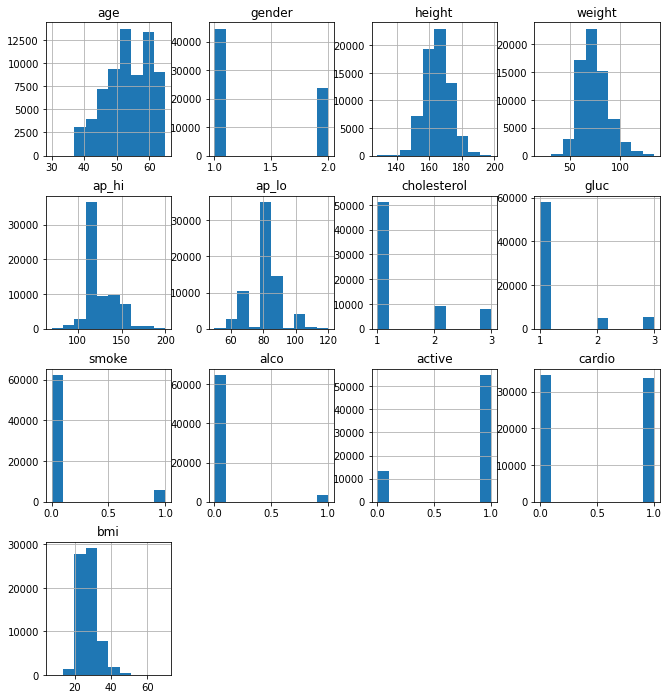

In [18]:
MCD = Mycariodataset
MCD.hist(figsize=(11,12))
plt.show()

> 1.   Logistic Regression




In [19]:
features = MCD[['age','bmi','ap_hi','ap_lo']]
target = MCD['cardio']

In [20]:
train_features,test_features,train_labels,test_labels=train_test_split(features,target,test_size=0.2,shuffle=False)
scaler=StandardScaler()
train_features=scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [ ]:
clf = LogisticRegression()
clf.fit(train_features, train_labels)
print(clf.score(train_features, train_labels))
log_train = clf.score(train_features, train_labels)
print(clf.score(test_features, test_labels))
log_test = clf.score(test_features, test_labels)
print(clf.coef_)

0.7205365639411463
0.717610891523935
[[0.36870701 0.16647229 0.96375972 0.11924345]]


In [ ]:
Me = np.array([24,24.60,120,80])
aa = np.array([31,17,68,147])
bb = np.array([54,34,120,162])
cc = np.array([14,26,77,147])
dd = np.array([65,38,120,200])

sample_people = np.array([Me, aa,bb,cc,dd])

sample_people = scaler.transform(sample_people)

print(clf.predict(sample_people))

[0 0 1 0 1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



>2. Decision Tree

In [ ]:
dtree = DecisionTreeClassifier()

clf=dtree.fit(train_features, train_labels)
y_pred = dtree.predict(test_features)

[Text(0.4736361347313892, 0.9857142857142858, 'X[2] <= 0.178\ngini = 0.5\nsamples = 54644\nvalue = [27667, 26977]'),
 Text(0.2596479458078326, 0.9571428571428572, 'X[0] <= 0.174\ngini = 0.432\nsamples = 32674\nvalue = [22360, 10314]'),
 Text(0.12133572466340346, 0.9285714285714286, 'X[0] <= -1.155\ngini = 0.36\nsamples = 19931\nvalue = [15245, 4686]'),
 Text(0.050126772235973845, 0.9, 'X[2] <= -0.733\ngini = 0.269\nsamples = 6411\nvalue = [5385, 1026]'),
 Text(0.026331476492662386, 0.8714285714285714, 'X[1] <= -0.371\ngini = 0.203\nsamples = 2699\nvalue = [2389, 310]'),
 Text(0.01634627828586049, 0.8428571428571429, 'X[3] <= 0.889\ngini = 0.154\nsamples = 1623\nvalue = [1487, 136]'),
 Text(0.007431887330592265, 0.8142857142857143, 'X[1] <= -1.552\ngini = 0.15\nsamples = 1593\nvalue = [1463, 130]'),
 Text(0.0006981592001316982, 0.7857142857142857, 'X[2] <= -1.311\ngini = 0.084\nsamples = 181\nvalue = [173, 8]'),
 Text(0.000253876072775163, 0.7571428571428571, 'X[3] <= -0.675\ngini = 0.0

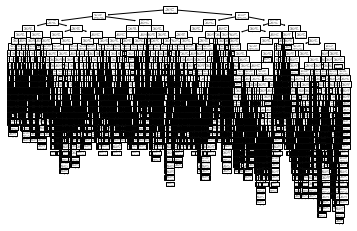

In [ ]:
tree.plot_tree(clf)

In [ ]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file = None)
graph = graphviz.Source(dot_data)
graph.render('cardio')

'cardio.pdf'

In [ ]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(train_features, train_labels)
print(dt.score(train_features, train_labels))
dt_train = dt.score(train_features, train_labels)
print(dt.score(test_features,test_labels))
dt_test = dt.score(test_features,test_labels)
print(dt.classes_)
print(dt.feature_importances_)

0.7776883097869849
0.6826233347972478
[0 1]
[0.19586628 0.16807311 0.55215429 0.08390631]


In [ ]:
Me = np.array([24,24.60,120,80])
aa = np.array([31,17,68,147])
bb = np.array([54,34,120,162])
cc = np.array([14,26,77,147])
dd = np.array([65,38,120,200])

sample_people = np.array([Me, aa,bb,cc,dd])

sample_people = scaler.transform(sample_people)

print(dt.predict(sample_people))
  

[0 1 0 0 1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



>>3-1.SVC(linear)

In [ ]:
clf_kl = svm.SVC(kernel = 'linear', C =1.0)
clf_kl.fit(train_features,train_labels)
print("SVC kernel_linear")
print("train data accuracy")
print(clf_kl.score(train_features,train_labels))
print("test data accurary")
print(clf_kl.score(train_features,train_labels))
print("clf coef")
print(clf_kl.coef_) 

from sklearn.metrics import confusion_matrix

y_pred = clf_kl.predict(train_features)
confusion_matrix(train_labels,y_pred) 

SVC kernel_linear
train data accuracy
0.7168216089598126
test data accurary
0.7168216089598126
clf coef
[[0.28646774 0.18580998 1.03785236 0.07905993]]


array([[22735,  4932],
       [10542, 16435]])

In [ ]:
SL_train = clf_kl.score(train_features,train_labels)
SL_test = clf_kl.score(train_features,train_labels)

>>3-2.SVC(poly)

In [21]:
clf_poly = svm.SVC(kernel = 'poly',C=1.0)
clf_poly.fit(train_features,train_labels)
print("SVC kernel_poly")
print("train data accurary")
print(clf_poly.score(train_features,train_labels))
print("test data accurary")
print(clf_poly.score(test_features, test_labels))

y_pred = clf_poly.predict(train_features)
y_pred
confusion_matrix(train_labels,y_pred) 

SVC kernel_poly
train data accurary
0.7125759461240027
test data accurary
0.7064119455423803


array([[23532,  4135],
       [11571, 15406]])

In [ ]:
SP_train=clf_poly.score(train_features,train_labels)
SP_test=clf_poly.score(test_features,test_labels)

>>3-3.SVC(rbf)


In [ ]:
clf_rbf = svm.SVC(kernel = 'rbf',C=1.0,gamma = 1)
clf_rbf.fit(train_features,train_labels)
print("SVC kernel_rbf")
print("train data accurary")
print(clf_rbf.score(train_features,train_labels))
print("test data accurary")
print(clf_rbf.score(test_features, test_labels))

y_pred = clf_rbf.predict(train_features)
confusion_matrix(train_labels,y_pred)

SVC kernel_rbf
train data accurary
0.7265390527779811
test data accurary
0.7223686136729615


array([[21540,  6127],
       [ 8816, 18161]])

In [ ]:
SR_train = clf_rbf.score(train_features,train_labels)
SR_test = clf_rbf.score(test_features, test_labels)

> >3-4.SVC(linear SVC)

In [ ]:
clf_linearSVC = svm.LinearSVC(C=1.0,max_iter = 10000)
clf_linearSVC.fit(train_features,train_labels)
print("SVC linearSVC")
print("train data accurary")
print(clf_linearSVC.score(train_features,train_labels))
print("test data accurary")
print(clf_linearSVC.score(test_features, test_labels))

y_pred = clf_linearSVC.predict(train_features)
confusion_matrix(train_labels,y_pred)

SVC linearSVC
train data accurary
0.7193653466071298
test data accurary
0.7172449128970868


array([[21735,  5932],
       [ 9403, 17574]])

In [ ]:
SLS_train = clf_linearSVC.score(train_features,train_labels)
SLS_test = clf_linearSVC.score(test_features, test_labels)

>>3-5.SVC(NuSVC)

In [ ]:
clf_NuSVC = svm.NuSVC(nu = 0.2,kernel = 'rbf',gamma= 'scale')
clf_NuSVC.fit(train_features,train_labels)
print("SVC NuSVC")
print("train data accurary")
print(clf_NuSVC.score(train_features,train_labels))
print("test data accurary")
print(clf_NuSVC.score(test_features, test_labels))

y_pred = clf_NuSVC.predict(train_features)
confusion_matrix(train_labels,y_pred)

SVC NuSVC
train data accurary
0.44859453919918013
test data accurary
0.45783926218708826


array([[12908, 14759],
       [15372, 11605]])

In [ ]:
NUS_train = clf_NuSVC.score(train_features,train_labels)
NUS_test = clf_NuSVC.score(test_features, test_labels)

>>SVM 예측

In [ ]:
Me = np.array([24,24.60,120,80])
aa = np.array([31,17,68,147])
bb = np.array([54,34,120,162])
cc = np.array([14,26,77,147])
dd = np.array([65,38,120,200])

sample_people = np.array([Me, aa,bb,cc,dd])

sample_people = scaler.transform(sample_people)
    


print ("SVC_linear_kernel 일 떄 예측 값")
print(clf_kl.predict(sample_people ))

print ("SVC_linear_kernel 일 떄 예측 값")
print(clf_poly.predict(sample_people ))

print ("SVC_linear_kernel 일 떄 예측 값")
print(clf_rbf.predict(sample_people ))

print ("linearSVCl 일 떄 예측 값")
print(clf_linearSVC.predict(sample_people ))

print ("clf_NuSVC 일 떄 예측 값")
print(clf_NuSVC.predict(sample_people ))

SVC_linear_kernel 일 떄 예측 값
[0 0 1 0 1]
SVC_linear_kernel 일 떄 예측 값
[0 0 1 0 1]
SVC_linear_kernel 일 떄 예측 값
[0 1 1 1 1]
linearSVCl 일 떄 예측 값
[0 0 1 0 1]
clf_NuSVC 일 떄 예측 값
[1 1 1 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



>4. KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
kk=knn.fit(train_features,train_labels)
kk.score(train_features,train_labels)

0.7251116316521484

<function matplotlib.pyplot.show(*args, **kw)>

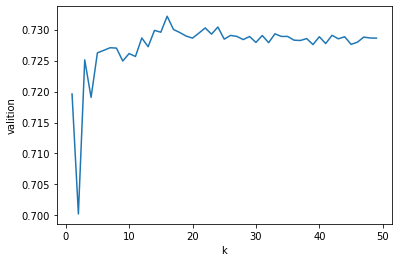

In [ ]:
K_list = range(1,50)
accuracies=[]
for k in K_list:
  knn= KNeighborsClassifier(n_neighbors=k)
  knn.fit(train_features,train_labels)
  accuracies.append(knn.score(train_features,train_labels))

plt.plot(K_list,accuracies)
plt.xlabel('k')
plt.ylabel('valition')
plt.show


In [ ]:
accuracies.index(max(accuracies))

15

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn=knn.fit(train_features,train_labels)
print(knn.score(train_features,train_labels))
print(knn.score(test_features,test_labels))

0.7295768977380865
0.7067047284438589


In [ ]:
knn_train=knn.score(train_features,train_labels)
knn_test=knn.score(test_features,test_labels)

In [ ]:
sample = np.array([[24,24.60,80,120]
                   ,[31,17,68,110]
                   ,[54,34,120,162]
                   ,[14,26,77,147]
                   ,[65,38,120,200]])
sample = scaler.transform(sample)
pred = knn.predict(sample)
pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([0, 0, 1, 1, 1])

> Conclusion

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'SVC(linear)','SVC(poly)','SVC(rbf)','SVC(linear SVC)','SVC(Nu)','K-Nearest Neighbor' ],
    'Train_Accuracy': [log_train,dt_train,SL_train,SP_train,SR_train,SLS_train,NUS_train,knn_train],
    'Test_Accuracy': [log_test,dt_test,SL_test,SP_test,SR_test,SLS_test,NUS_test,knn_test]})
models

,Model,Train_Accuracy,Test_Accuracy
0,Logistic Regression,0.720537,0.717611
1,Decision Tree,0.777688,0.682623
2,SVC(linear),0.716822,0.716822
3,SVC(poly),0.712576,0.706412
4,SVC(rbf),0.726539,0.722369
5,SVC(linear SVC),0.719365,0.717245
6,SVC(Nu),0.448595,0.457839
7,K-Nearest Neighbor,0.729577,0.706705


In [ ]:
df_plotting = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'SVC(linear)','SVC(poly)','SVC(rbf)','SVC(linear SVC)','SVC(Nu)','K-Nearest Neighbor',
              'Logistic Regression', 'Decision Tree', 'SVC(linear)','SVC(poly)','SVC(rbf)','SVC(linear SVC)','SVC(Nu)','K-Nearest Neighbor' ],
    'Values': [log_train,dt_train,SL_train,SP_train,SR_train,SLS_train,NUS_train,knn_train,
               log_test,dt_test,SL_test,SP_test,SR_test,SLS_test,NUS_test,knn_test],
    'Type': ['Train_Accuracy', 'Train_Accuracy','Train_Accuracy','Train_Accuracy','Train_Accuracy','Train_Accuracy','Train_Accuracy','Train_Accuracy', 
             'Test_Accuracy', 'Test_Accuracy', 'Test_Accuracy', 'Test_Accuracy', 'Test_Accuracy', 'Test_Accuracy', 'Test_Accuracy', 'Test_Accuracy']})


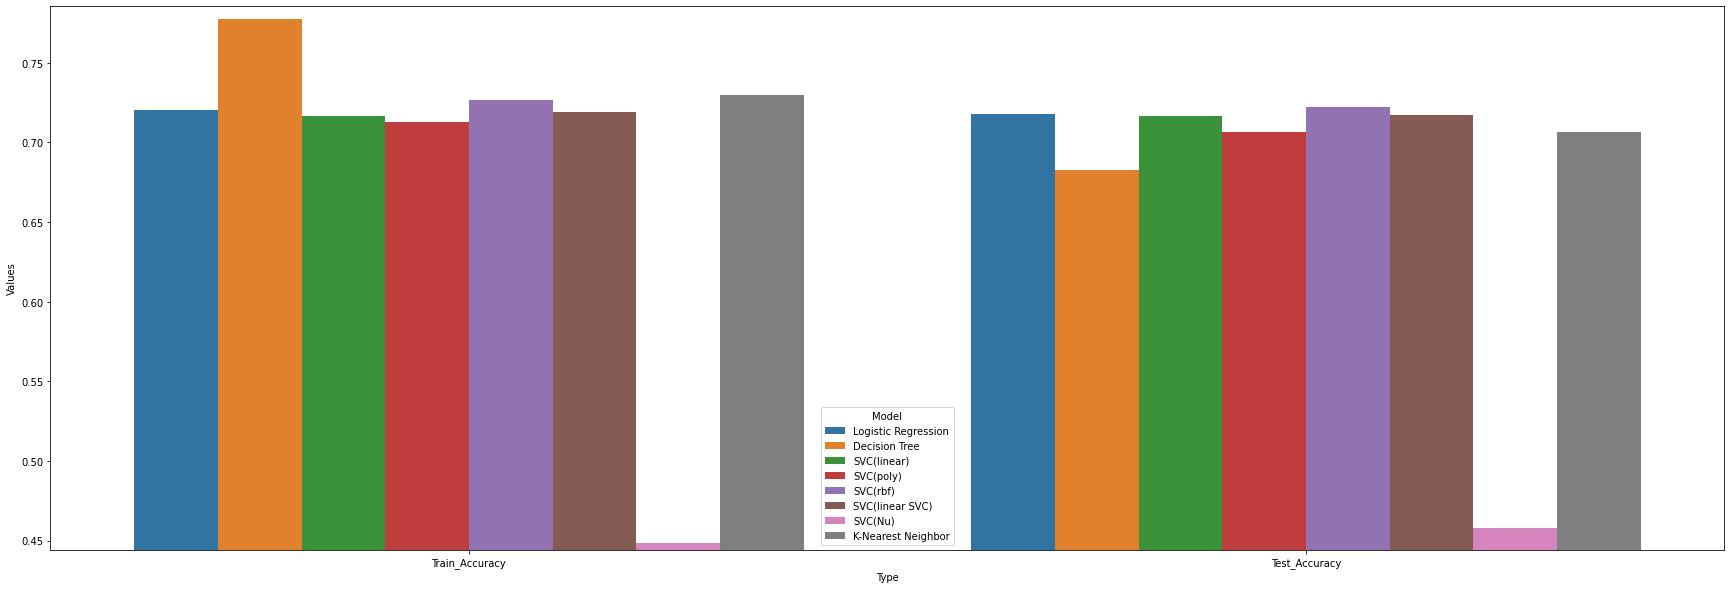

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(y=df_plotting['Values'],x=df_plotting['Type'], hue=df_plotting['Model'], orient ="v")
plt.ylim(min(df_plotting['Values'])* 0.99, max(df_plotting['Values'])*1.01)
plt.gcf().set_size_inches(30,10)
plt.show()

In [ ]:
Me = np.array([24,24.60,120,80])
aa = np.array([31,17,68,147])
bb = np.array([54,34,120,162])
cc = np.array([14,26,77,147])
dd = np.array([65,38,120,200])
print('테스트 예제의 예측')
print("1.logistic Regression")
print(clf.predict(sample_people))
print("2. Decision Tree")
print(dt.predict(sample_people))
print("3. SVC_linear kernel")
print(clf_kl.predict(sample_people))
print("4. SVC_poly kernel")
print(clf_poly.predict(sample_people))
print("5. SVC_rbf_kernel")
print(clf_rbf.predict(sample_people))
print("6. linear_SVC")
print(clf_linearSVC.predict(sample_people))
print("7. NuSVC")
print(clf_NuSVC.predict(sample_people))
print("8. K-Nearest Neighbor")
print(knn.predict(sample))


테스트 예제의 예측
1.logistic Regression
[0 1 0 0 1]
2. Decision Tree
[0 1 0 0 1]
3. SVC_linear kernel
[0 0 1 0 1]
4. SVC_poly kernel
[0 0 1 0 1]
5. SVC_rbf_kernel
[0 1 1 1 1]
6. linear_SVC
[0 0 1 0 1]
7. NuSVC
[1 1 1 1 1]
8. K-Nearest Neighbor
[0 0 1 1 1]
